#  1) Importing Data
<p>Here We are Using Python's Pandas Function to import the data and store it in a Data Frame

The CSV file is obtained from https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

,which consists of all flight crashes snice 1908 to 2008</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib as mpl

df=pd.read_csv("Dataset/Airplane_Crashes_and_Fatalities_Since_1908.csv")
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (14, 8)


<p><strong> The following gives us the Raw information of the Dataset before Preprocessing</strong></p>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


<p><strong>A Sample of The Dataset before Preprocessing</strong> </p>

In [3]:
df.head(4000)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


<p><strong> Removal of columns which are not required </strong></p>

In [4]:
df1=df.drop(['Time','Flight #','Route','Registration','cn/In'],axis=1)
df1

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,"Potters Bar, England",Military - German Navy,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


<p><strong>Removing Missing Values and Converting Date column to Datetime Object </strong></p>

In [5]:
df2=df1.dropna().copy()
df2.Date=pd.to_datetime(df2.Date)

<p><strong>Information about the Dataset after applying Preprocessing Techniques </strong></p>

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 5267
Data columns (total 8 columns):
Date          4814 non-null datetime64[ns]
Location      4814 non-null object
Operator      4814 non-null object
Type          4814 non-null object
Aboard        4814 non-null float64
Fatalities    4814 non-null float64
Ground        4814 non-null float64
Summary       4814 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 338.5+ KB


<p><strong>A Sample of the Dataset after Preprocessing </strong></p>

In [7]:
df2

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,1916-09-24,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,1916-10-01,"Potters Bar, England",Military - German Navy,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


<p><strong>Summary Statistics of the Dataset </strong></p>

In [8]:
df2.describe()

,Aboard,Fatalities,Ground
count,4814.000000,4814.000000,4814.000000
mean,29.127960,21.160366,1.737225
std,44.268868,34.343162,56.351968
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,14.000000,10.000000,0.000000
75%,32.000000,24.000000,0.000000
max,644.000000,583.000000,2750.000000


<p><strong>Grouping the Dataset with respect to 'Operator' and 'Fatalities' </strong></p>

In [9]:
p=df2.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False)
print(p.head(50))

Operator
Aeroflot                                      6752.0
Military - U.S. Air Force                     3576.0
Air France                                    1705.0
American Airlines                             1421.0
Pan American World Airways                    1301.0
Military - U.S. Army Air Forces               1070.0
United Air Lines                              1017.0
AVIANCA                                        915.0
Turkish Airlines (THY)                         891.0
Indian Airlines                                863.0
China Airlines (Taiwan)                        844.0
Air India                                      827.0
Military - Russian Air Force                   797.0
Trans World Airlines                           784.0
Japan Air Lines                                764.0
Military - U.S. Navy                           755.0
Korean Airlines                                713.0
Eastern Air Lines                              710.0
Pakistan International Airlines      

<p><strong>A Bar Plot of 'Operator' vs 'Fatalities'</strong></p>

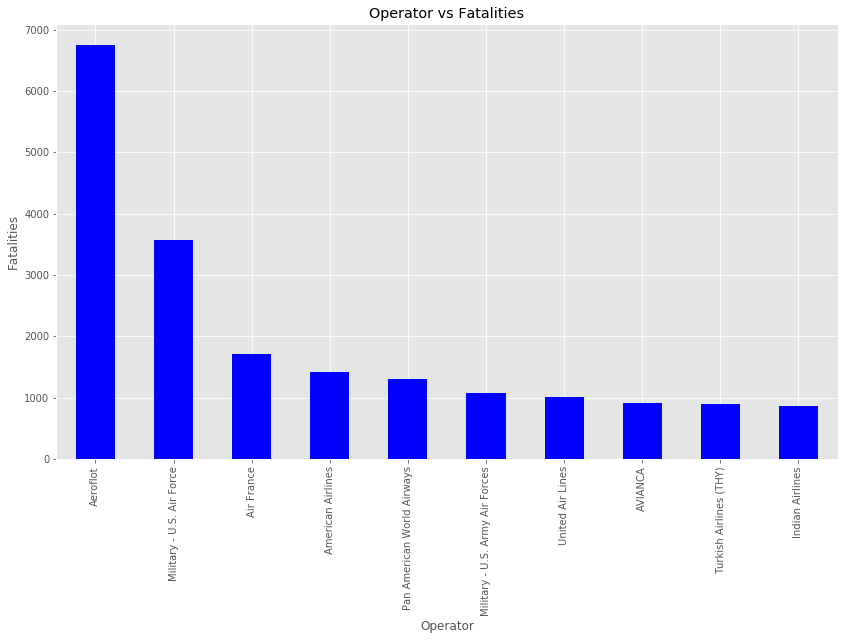

In [10]:
p.head(10).plot(kind='bar',color='blue')
plt.title('Operator vs Fatalities')
plt.ylabel('Fatalities')
plt.show()

<p><strong>Grouping the Dataset with respect to 'Location' and 'Fatalities' </strong></p>

In [11]:
l=df2.groupby('Location')['Fatalities'].sum().sort_values(ascending=False)
print(l.head(50))

Location
Tenerife, Canary Islands                              761.0
Mt. Osutaka, near Ueno Village, Japan                 520.0
Sao Paulo, Brazil                                     362.0
Moscow, Russia                                        362.0
Near Charkhidadri, India                              349.0
Near Ermenonville, France                             346.0
AtlantiOcean, 110 miles West of Ireland               329.0
Taipei, Taiwan                                        328.0
Near Moscow, Russia                                   319.0
Near Riyadh, Saudi Arabia                             301.0
Kano, Nigeria                                         300.0
Over the Persian Gulf, near Bandar Abbas, Iran        290.0
Near Irkutsk, Russia                                  277.0
Agana, Guam                                           276.0
Off Bandra, Maharashtra, India                        276.0
Near Shahdad, Iran                                    275.0
Tehran, Iran                   

<p><strong>A Bar plot of 'Location' vs 'Fatalities' </strong></p>

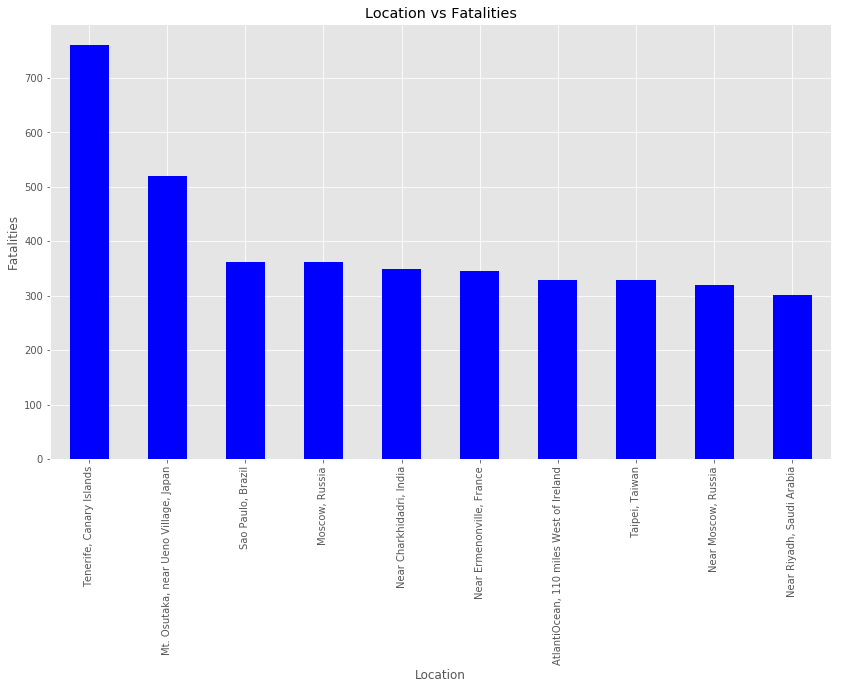

In [12]:
plt.figure(figsize=(14, 8))
l.head(10).plot(kind='bar',color='blue')
plt.title('Location vs Fatalities')
plt.ylabel('Fatalities')
plt.show()

<p><strong>A Bar plot of 'Accidents' and 'Operator' </strong></p>

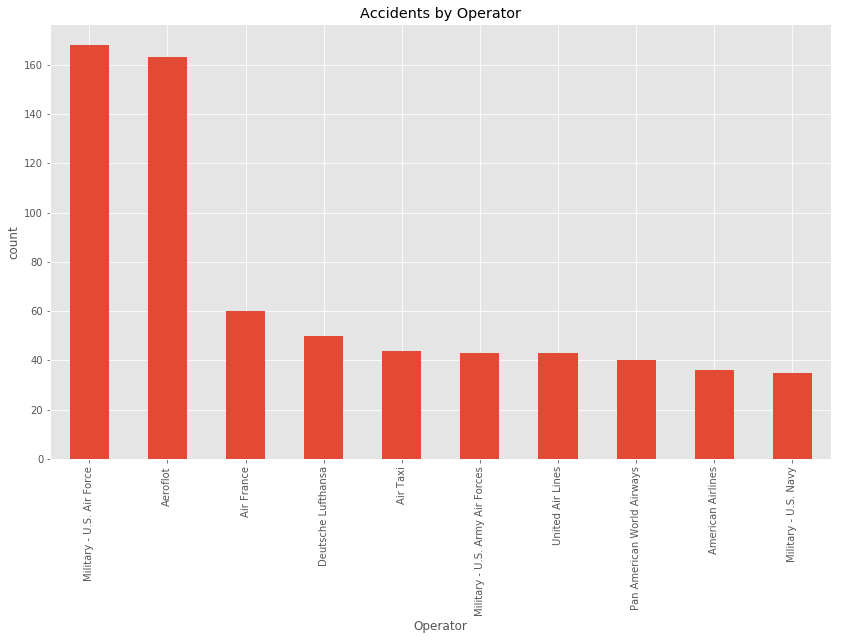

In [13]:
o=df2.groupby('Operator')['Date'].count().sort_values(ascending=False)
o.head(10).plot(kind='bar')
plt.title('Accidents by Operator')
plt.ylabel('count')
plt.show()

<p><strong> Total survived</strong></p>

In [14]:
df2['Survived']= df2.Aboard-df2.Fatalities
df2


,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survived
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0
5,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...,20.0
6,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",0.0
7,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",0.0
8,1916-09-24,"Billericay, England",Military - German Navy,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,0.0
9,1916-10-01,"Potters Bar, England",Military - German Navy,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,0.0


<p><strong>Summary of aboard,fatalities,ground and survived</strong></p>

      Aboard  Fatalities  Ground  Survived
Date                                      
1908     2.0         1.0     0.0       1.0
1912     5.0         5.0     0.0       0.0
1913    51.0        45.0     0.0       6.0
1915    60.0        40.0     0.0      20.0
1916   109.0       108.0     0.0       1.0
1917   124.0       124.0     0.0       0.0
1918    64.0        64.0     0.0       0.0
1919     1.0         1.0     0.0       0.0
1920    10.0         6.0     0.0       4.0
1921    51.0        51.0     1.0       0.0
1922    57.0        46.0     5.0      11.0
1923    52.0        52.0     0.0       0.0
1924     8.0         8.0     0.0       0.0
1925    47.0        18.0     0.0      29.0
1926    31.0        19.0     0.0      12.0
1927    47.0        30.0     0.0      17.0
1928    76.0        70.0     0.0       6.0
1929   120.0        96.0     0.0      24.0
1930   154.0       117.0     0.0      37.0
1931    92.0        75.0     0.0      17.0
1932    59.0        54.0     0.0       5.0
1933   180.

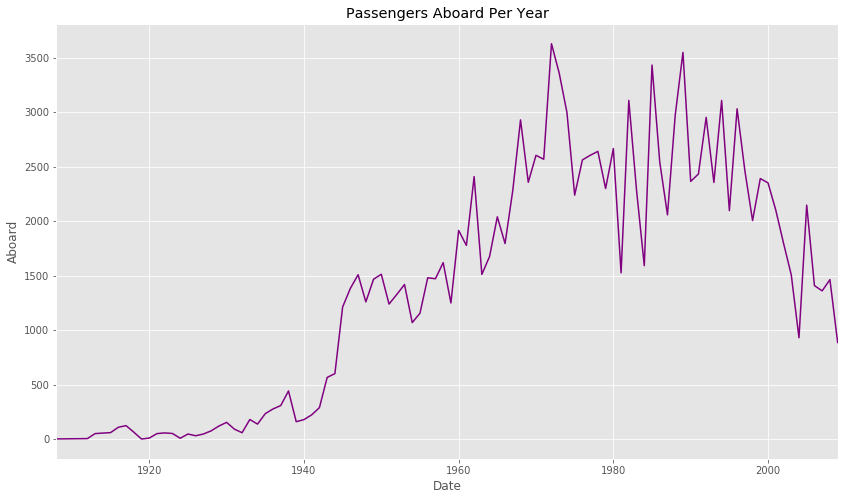

In [15]:
ab=df2.groupby(df2.Date.dt.year).sum()
print(ab)

ab.Aboard.plot(color='purple')
plt.ylabel('Aboard')
plt.title('Passengers Aboard Per Year')
plt.show()

<p><strong>Line plot for fatalities per year</strong></p>

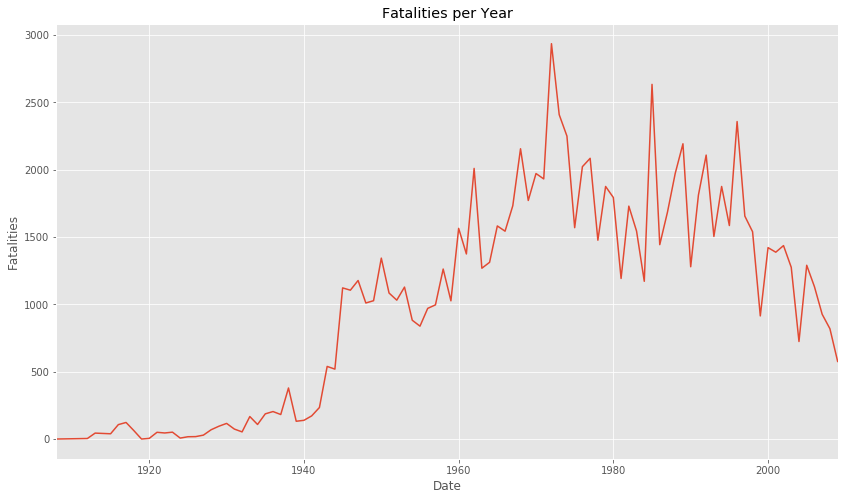

In [16]:

ab['Fatalities'].plot()
plt.title('Fatalities per Year')
plt.ylabel('Fatalities')
plt.show()

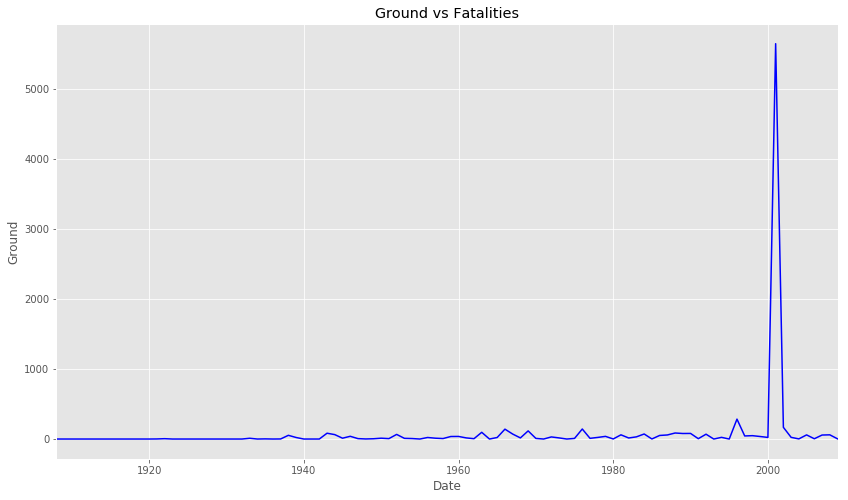

In [17]:
ab.Ground.plot(color='Blue')
plt.ylabel('Ground')
plt.title('Ground vs Fatalities')
plt.show()

<p><strong>Line plot for accidents per year</strong></p>

Date
1908    1
1912    1
1913    3
1915    2
1916    5
1917    6
1918    3
1919    1
1920    2
1921    2
Name: Date, dtype: int64


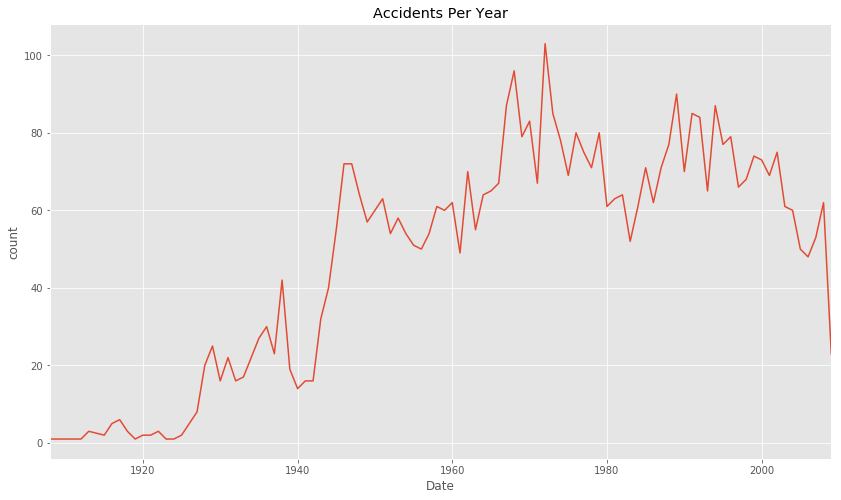

In [18]:
yer=df2.groupby(df2.Date.dt.year)['Date'].count()
print(yer.head(10))
plt.title('Accidents Per Year')
plt.ylabel('count')
yer.plot()
plt.show()

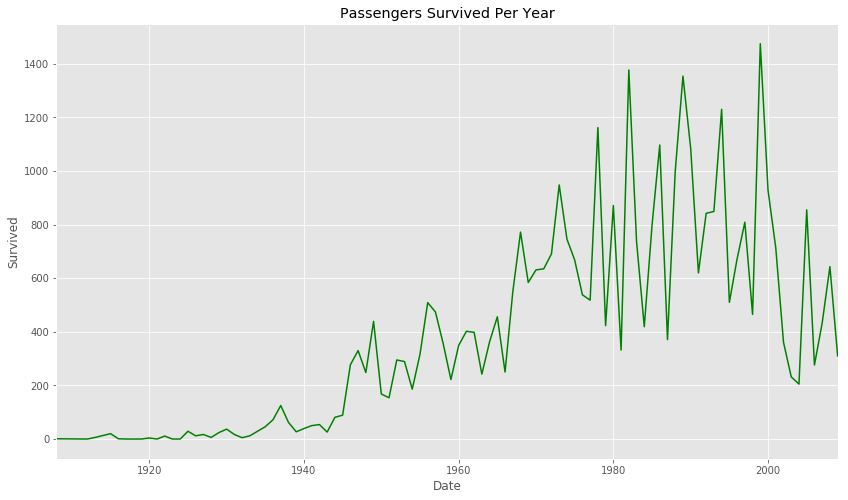

In [19]:
ab.Survived.plot(color='Green')
plt.title('Passengers Survived Per Year')
plt.ylabel('Survived')
plt.show()


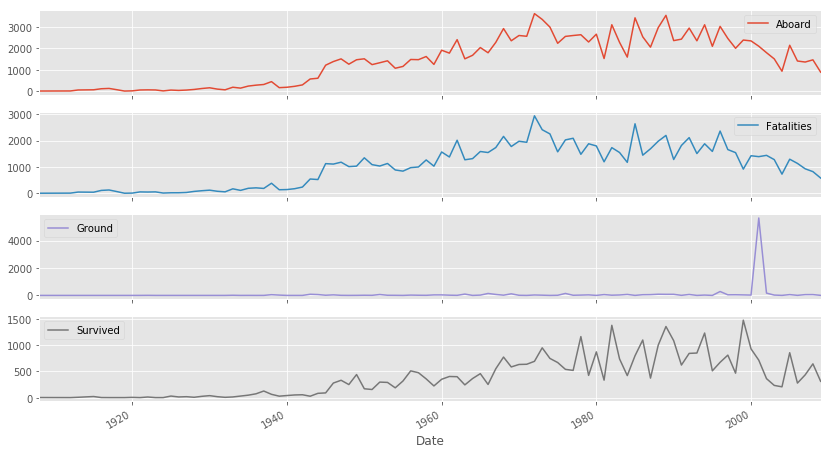

In [20]:
ab.plot(subplots=True)
plt.show()

In [21]:
temp =df2.copy()
temp['ismilitary']=df2.Operator.str.contains('Military')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 5267
Data columns (total 10 columns):
Date          4814 non-null datetime64[ns]
Location      4814 non-null object
Operator      4814 non-null object
Type          4814 non-null object
Aboard        4814 non-null float64
Fatalities    4814 non-null float64
Ground        4814 non-null float64
Summary       4814 non-null object
Survived      4814 non-null float64
ismilitary    4814 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(4), object(4)
memory usage: 380.8+ KB


<p><strong>Bar plot containg military and non military</strong></p>

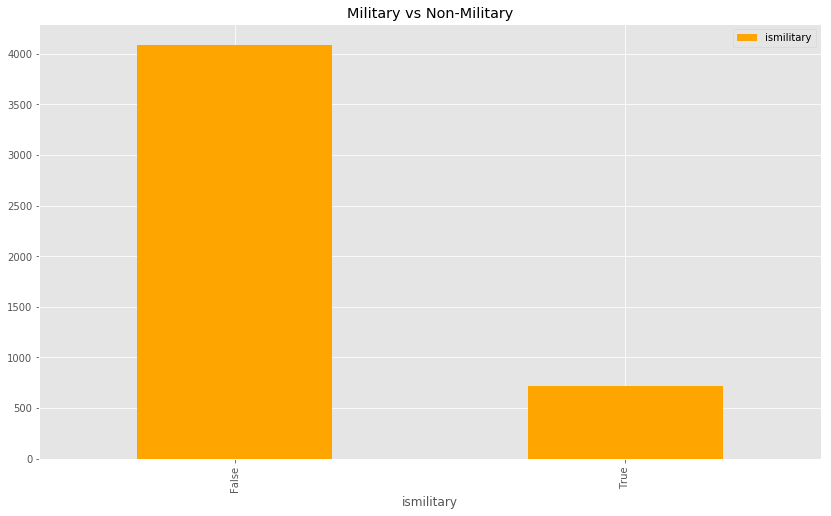

In [22]:
temp.head(5)
temp1=temp.groupby('ismilitary')[['ismilitary']].count()
temp1.plot(kind='bar',color='orange')
plt.title('Military vs Non-Military')
plt.show()

# Aircraft Crashes Causes

causes not avaiable: 5268
unindentified causes: 3319
engine failure 420
poor weather 416
stall 271
pilot error 152
shot down 133
turbulence 117
on fire 116
fuel exhaustion 71
electrical problem 41
structure failure 39
terrorism 12


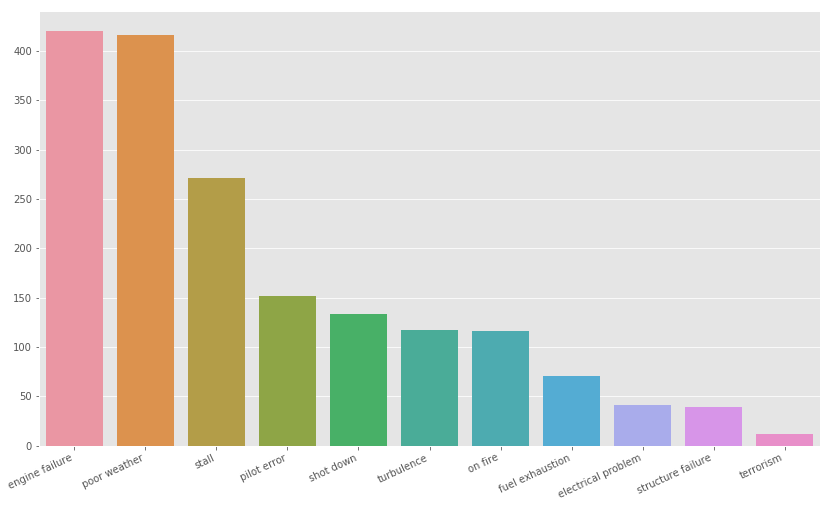

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import operator

data = pd.read_csv("Dataset/Airplane_Crashes_and_Fatalities_Since_1908.csv")

failures = {
    'pilot error': '(pilot|crew) (error|fatigue)',
    'engine failure': 'engine.*(fire|fail)',
    'structure failure': '(structural fail)|(fuel leak)|(langing gear)',
    'electrical problem': 'electrical',
    'poor weather': '((poor|bad).*(weather|visibility)|thunderstorm)',
    'stall': 'stall',
    'on fire': '(caught fire)|(caught on fire)',
    'turbulence': 'turbulence',
    'fuel exhaustion': '(out of fuel)|(fuel.*exhaust)',
    'terrorism': 'terrorist|terrorism',
    'shot down': 'shot down',
}

failure_counts = {'other':0}

for s in data.Summary.dropna():
    other = True
    for failure, exp in failures.items():
        if re.search(exp, s.lower()):
            other = False
            if failure in failure_counts:
                failure_counts[failure] += 1
            else:
                failure_counts[failure] = 1
    if other:
        failure_counts['other'] += 1

nan_counts = len(data.Summary.isnull())
print('causes not avaiable: %d' % nan_counts)
print('unindentified causes: %d' % failure_counts['other'])

del failure_counts['other']

sortedcauses = sorted(failure_counts.items(), key=operator.itemgetter(1), reverse=True)
for k, v in sortedcauses:
    print(k, v)


    
xlist=[]
ylist=[]


for i in range(11):
    xlist.append(sortedcauses[i][0])

for i in range(11):
    ylist.append(sortedcauses[i][1])
    
plt.figure(figsize=(14, 8))
sns.barplot(x=xlist, y=ylist)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

# Unsupervised Learning


In [24]:
cluster_df = df2.loc[:, ["Aboard", "Fatalities","Survived"]]
cluster_df

,Aboard,Fatalities,Survived
0,2.0,1.0,1.0
1,5.0,5.0,0.0
2,1.0,1.0,0.0
3,20.0,14.0,6.0
4,30.0,30.0,0.0
5,41.0,21.0,20.0
6,19.0,19.0,0.0
7,20.0,20.0,0.0
8,22.0,22.0,0.0
9,19.0,19.0,0.0


<p><strong>converting the values to numpy array</strong></p>

In [25]:
sample=cluster_df.as_matrix()
print(sample)
print(sample.shape)

[[   2.    1.    1.]
 [   5.    5.    0.]
 [   1.    1.    0.]
 ..., 
 [ 228.  228.    0.]
 [   1.    1.    0.]
 [  13.   13.    0.]]
(4814, 3)


<p><strong>Selection of "k" value</strong></p>

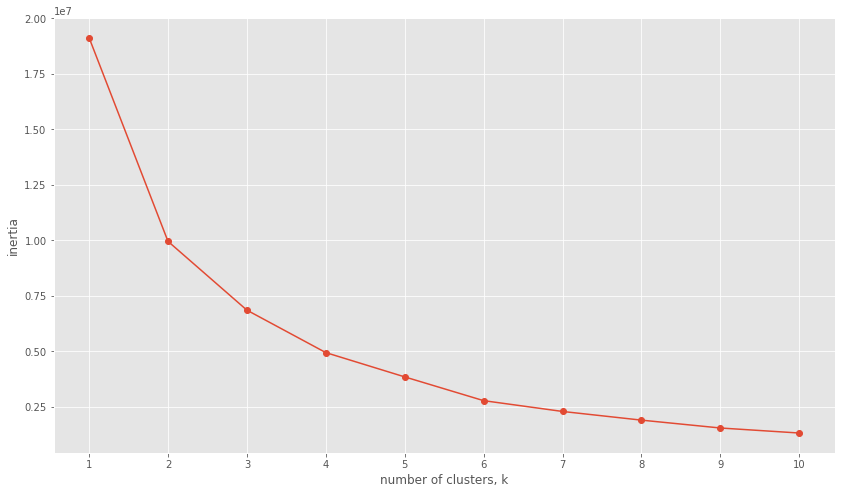

In [26]:
ks = range(1, 11)
inertias = []

for k in ks:
    model =KMeans(n_clusters=k)
    model.fit(sample)
    inertias.appende_)
    

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [27]:
model = KMeans(n_clusters=5)

In [28]:
model.fit(sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
print(model.inertia_)

3815436.51311


In [30]:
labels=model.predict(sample)

In [31]:
print(labels)

[0 0 0 ..., 4 0 0]


<p><strong>Scatter plots</strong></p>

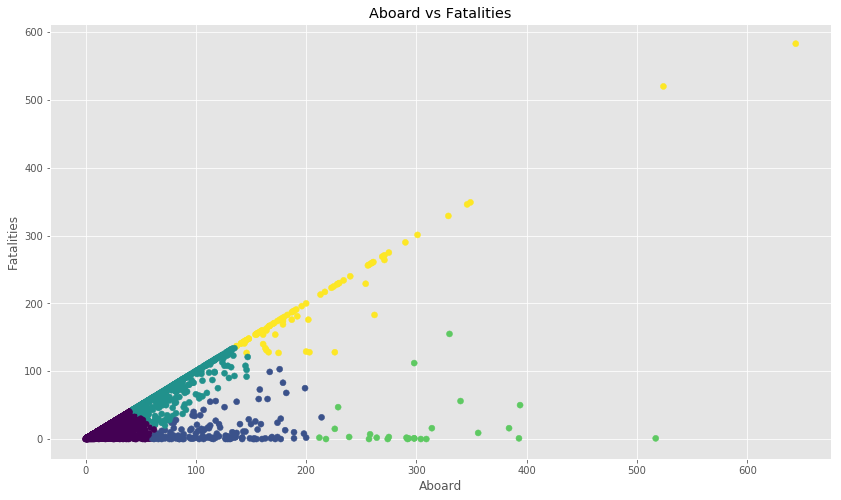

In [32]:
xs = sample[:,0]
ys = sample[:,1]
plt.scatter(xs, ys, c=labels)
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Aboard vs Fatalities')
plt.show()

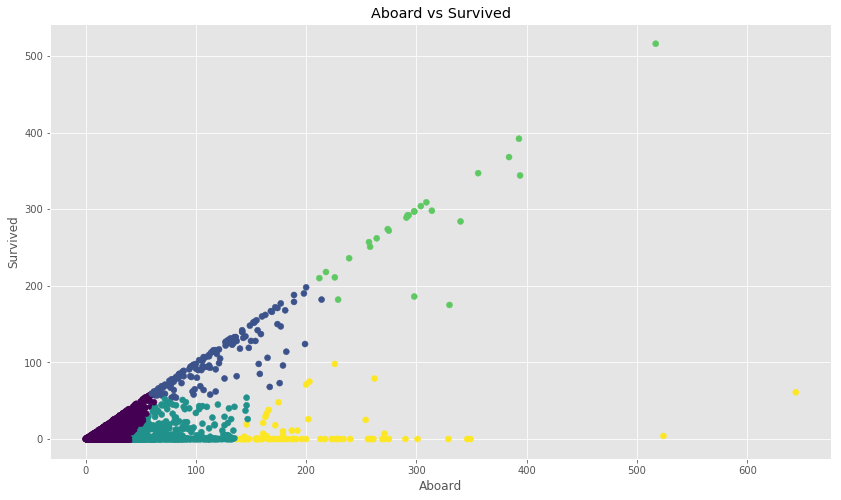

In [33]:
xs = sample[:,0]
ys = sample[:,2]
plt.scatter(xs, ys, c=labels)
plt.xlabel('Aboard')
plt.ylabel('Survived')
plt.title('Aboard vs Survived')
plt.show()

In [34]:
operator = df2['Operator'].copy()
len(operator.unique())

2361

<p><strong>classifying observations based on clustering</strong></p>

In [35]:
newdf=pd.DataFrame({'labels':labels,'Operator':operator})
ct = pd.crosstab(newdf['labels'],newdf['Operator'])
type(ct)
ct.head(4000)

Operator,A B Aerotransport,AB Aerotransport,ACES Colombia,ADC Airlines,ADES Colombia,AECA Cargo,AIDA,AIRES Colombia,ALADA,ALFA,...,Yates Aviation,Yemen Airlines,Yeti Airlines,Yute Air Alaska - Air Taxi,Zanex,Zantop Air Transport,Zantop Airways,Zantop International Airlines,Zen Nippon,de Havilland Aircraft
labels,,,,,,,,,,,,,,,,,,,,,
0,1,2,3,1,2,1,1,2,1,1,...,1,2,3,2,1,4,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
for i in ct.iteritems():
    print(i)

('A B Aerotransport', labels
0    1
1    0
2    0
3    0
4    0
Name: A B Aerotransport, dtype: int64)
('AB Aerotransport', labels
0    2
1    0
2    1
3    0
4    0
Name: AB Aerotransport, dtype: int64)
('ACES Colombia', labels
0    3
1    0
2    0
3    0
4    0
Name: ACES Colombia, dtype: int64)
('ADC Airlines', labels
0    1
1    0
2    1
3    0
4    0
Name: ADC Airlines, dtype: int64)
('ADES Colombia', labels
0    2
1    0
2    0
3    0
4    0
Name: ADES Colombia, dtype: int64)
('AECA Cargo', labels
0    1
1    0
2    0
3    0
4    0
Name: AECA Cargo, dtype: int64)
('AIDA', labels
0    1
1    0
2    0
3    0
4    0
Name: AIDA, dtype: int64)
('AIRES Colombia', labels
0    2
1    0
2    0
3    0
4    0
Name: AIRES Colombia, dtype: int64)
('ALADA', labels
0    1
1    0
2    0
3    0
4    0
Name: ALADA, dtype: int64)
('ALFA', labels
0    1
1    0
2    0
3    0
4    0
Name: ALFA, dtype: int64)
('ALIANSA Colombia', labels
0    1
1    0
2    0
3    0
4    0
Name: ALIANSA Colombia, dtype: 

Name: Deruluft, dtype: int64)
('Det Danske Luftfartselskab', labels
0    1
1    0
2    0
3    0
4    0
Name: Det Danske Luftfartselskab, dtype: int64)
('Deutsche Flugdienst', labels
0    1
1    0
2    0
3    0
4    0
Name: Deutsche Flugdienst, dtype: int64)
('Deutsche Lufthansa', labels
0    50
1     0
2     0
3     0
4     0
Name: Deutsche Lufthansa, dtype: int64)
('Deutsche Zeppelin Reederei', labels
0    0
1    1
2    0
3    0
4    0
Name: Deutsche Zeppelin Reederei, dtype: int64)
('Devener Flying Service - Taxi', labels
0    1
1    0
2    0
3    0
4    0
Name: Devener Flying Service - Taxi, dtype: int64)
('Devlet Hava Yollairi', labels
0    1
1    0
2    0
3    0
4    0
Name: Devlet Hava Yollairi, dtype: int64)
('Devlet Hava Yollari', labels
0    4
1    0
2    0
3    0
4    0
Name: Devlet Hava Yollari, dtype: int64)
('Dirgantara Air Service', labels
0    1
1    0
2    0
3    0
4    0
Name: Dirgantara Air Service, dtype: int64)
('Dirgantara Air Services', labels
0    5
1    0
2    0

Name: Valley Air Service - Air Taxi, dtype: int64)
('ValuJet', labels
0    0
1    1
2    1
3    0
4    0
Name: ValuJet, dtype: int64)
('Vanair', labels
0    2
1    0
2    0
3    0
4    0
Name: Vanair, dtype: int64)
('Varig', labels
0    12
1     0
2     4
3     0
4     0
Name: Varig, dtype: int64)
('Varney Air Lines', labels
0    6
1    0
2    0
3    0
4    0
Name: Varney Air Lines, dtype: int64)
('Varney Airlines', labels
0    1
1    0
2    0
3    0
4    0
Name: Varney Airlines, dtype: int64)
('Vayudoot', labels
0    2
1    0
2    0
3    0
4    0
Name: Vayudoot, dtype: int64)
('Vehu Akat', labels
0    1
1    0
2    0
3    0
4    0
Name: Vehu Akat, dtype: int64)
('Venezolana', labels
0    1
1    0
2    0
3    0
4    0
Name: Venezolana, dtype: int64)
('Venezolana Internacional de Aviacion', labels
0    0
1    0
2    1
3    0
4    0
Name: Venezolana Internacional de Aviacion, dtype: int64)
('Venezuelian Government', labels
0    1
1    0
2    0
3    0
4    0
Name: Venezuelian Government, 

In [37]:
ct.loc[:,('Aeroflot','Military - U.S. Air Force' ,'Air France','American Airlines','Pan American World Airways')]

Operator,Aeroflot,Military - U.S. Air Force,Air France,American Airlines,Pan American World Airways
labels,,,,,
0,91,145,39,23,24
1,11,3,2,4,3
2,57,18,15,6,8
3,0,1,3,0,3
4,4,1,1,3,2


In [38]:
comp=df2.Operator.str.contains('ACES Colombia').copy()
df2[comp]

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survived
3324,1981-12-18,"Near Covenas, Colombia",ACES Colombia,de Havilland Canada DHC-6 Twin Otter 300,13.0,13.0,0.0,Struck high ground.,0.0
3616,1986-04-27,"Near Saravena, Colombia",ACES Colombia,de Havilland Canada DHC-6 Twin Otter 300,13.0,13.0,0.0,"Crashed into a 8,500 ft. mountain in poor weat...",0.0
4463,1996-11-30,"Medellin, Colombia",ACES Colombia,de Havilland Canada DHC-6 Twin Otter 300,15.0,14.0,0.0,The aircraft crashed into a mountain 5 minutes...,1.0


In [39]:
comp1=df2.Operator.str.contains('ADC Airlines').copy()
df2[comp1]

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survived
4505,1997-07-29,"Calabar , Nigeria",ADC Airlines,BAC One-Eleven 203AE,55.0,1.0,0.0,Overshot the runway in heavy rain and came to ...,54.0
5123,2006-10-29,"Near Abuja, Nigeria",ADC Airlines,Boeing 737-2B7,105.0,96.0,0.0,The jetliner crashed into a corn field about a...,9.0


# Supervised Learning


In [40]:
temp.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survived,ismilitary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,True
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,True
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,False
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,True
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,True


In [41]:
temp_data=temp.loc[:, ["Aboard", "Fatalities","Survived"]].as_matrix()
temp_data

array([[   2.,    1.,    1.],
       [   5.,    5.,    0.],
       [   1.,    1.,    0.],
       ..., 
       [ 228.,  228.,    0.],
       [   1.,    1.,    0.],
       [  13.,   13.,    0.]])

In [42]:
temp_data.shape

(4814, 3)

In [43]:
temp_ta=temp.loc[:,['ismilitary']].as_matrix()
print(temp_ta)

[[ True]
 [ True]
 [False]
 ..., 
 [False]
 [False]
 [ True]]


In [44]:
temp_target=temp_ta.flatten()
print(temp_target)
temp_target.shape

[ True  True False ..., False False  True]


(4814,)

In [45]:
knn = KNeighborsClassifier(n_neighbors=6)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(temp_data, temp_target, test_size=0.3,random_state=21, 
                                                    stratify=temp_target)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

<p><strong>Selection of "K" value</strong></p>

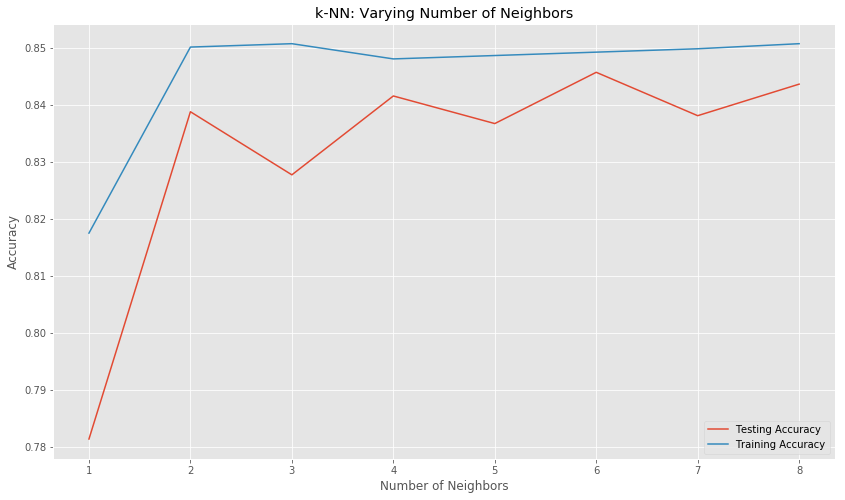

In [47]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<p><strong>Predection of test set</strong></p>

In [48]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [False False False ..., False False False]


In [49]:
print(confusion_matrix(y_test, y_pred))

[[1211   17]
 [ 209    8]]


<p><strong>METRICS REPORT</strong></p>

In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.85      0.99      0.91      1228
       True       0.32      0.04      0.07       217

avg / total       0.77      0.84      0.79      1445



<p text-align="center"><strong>IN THIS WAY  FLIGHT CRASH ANALYSYS IS DONE USING DATA MINING TECHNIQUES </strong></p>